# One dimensional toy data

In [1]:
# %load_ext autoreload
# %autoreload 2

import numpy as np

### Data
h = np.array([1, 2, 3, 4, 3, 4, 5, 4, 3, 2, 3, 4, 5, 6, 5, 6, 7, 6, 5, 4, 3, 2, 1, 2, 1])

W = np.zeros((25, 25), dtype='int8')
W[np.eye(len(W), k=1, dtype='bool')] = 1
W[np.eye(len(W), k=-1, dtype='bool')] = 1

In [2]:
import pandas as pd
pd.DataFrame(W)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from echelon.api import EchelonAnalysis
analyzer = EchelonAnalysis()
result = analyzer(h, W)
result

/Users/teshima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/Users/teshima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/sparse/compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


Result_EchelonAnalysis(peak_echelons=[[16, 17, 15], [13], [6, 5, 7], [3], [23]], foundation_echelons=[[12, 14, 18, 19, 11, 10, 20], [2, 4, 8], [1, 9, 21], [0, 22, 24]], hierarchy_tree=Node('/8'), oracle=<echelon.oracle.NdarrayEchelonOracle object at 0x7fcae20f41d0>)

In [4]:
def _echelon_indicator(echelon):
    A = np.zeros(h.shape, dtype='int8')
    for e in echelon:
        A[e] = 1
    return A

for i, echelon in enumerate(result.peak_echelons):
    print(f'Peak Echelon {i+1}')
    print(_echelon_indicator(echelon))

for i, echelon in enumerate(result.foundation_echelons):
    print(f'Foundation Echelon {i+1}')
    print(_echelon_indicator(echelon))


Peak Echelon 1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
Peak Echelon 2
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
Peak Echelon 3
[0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Peak Echelon 4
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Peak Echelon 5
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Foundation Echelon 1
[0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0]
Foundation Echelon 2
[0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Foundation Echelon 3
[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
Foundation Echelon 4
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]


In [5]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

In [6]:
# def augmented_dendrogram(labels,*args, **kwargs):
#     ddata = cl.dendrogram(*args, **kwargs)
#     if not kwargs.get('no_plot', False):
#         for ind,(i, d) in enumerate(zip(ddata['icoord'], ddata['dcoord'])):
#             x = 0.5 * sum(i[1:3])
#             y = d[1]
#             plt.plot(x, y, 'ro')
#             plt.annotate(labels[ind], (x, y), xytext=(10,15),
#                          textcoords='offset points',
#                          va='top', ha='center')
# return ddata

In [9]:
print(analyzer.dendrogram(result))

E8: [0, 22, 24]
 (max: 1)

├── E7: [1, 9, 21]
│    (max: 2)
│   
│   ├── E6: [2, 4, 8]
│   │    (max: 3)
│   │   
│   │   ├── E3: [3]
│   │   │    (max: 4)
│   │   │   
│   │   └── E2: [6, 5, 7]
│   │        (max: 5)
│   │       
│   └── E5: [12, 14, 18, 19, 11, 10, 20]
│        (max: 5)
│       
│       ├── E1: [13]
│       │    (max: 6)
│       │   
│       └── E0: [16, 17, 15]
│            (max: 7)
│           
└── E4: [23]
     (max: 2)
    


['10=2+7', '11=0+9', '12=1+6', '13=5+10', '14=11+12', '15=4+8', '16=14+15', '17=13+16', '18=3+17']


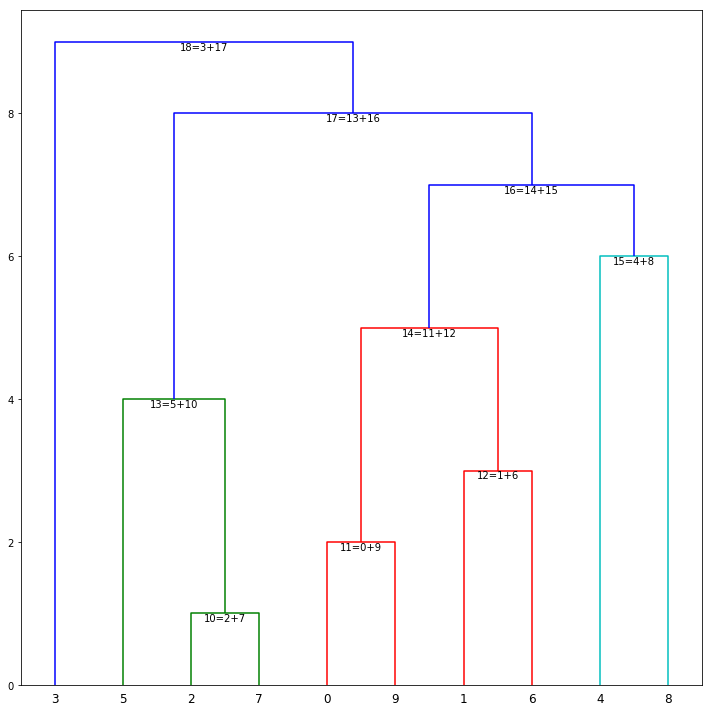

In [8]:
"""
Parameters:
    Z: Linkage array

Note:
    Contents of the linkage array.

        * 0th and 1st columns: two indices of data.
        * The 
"""

Z = np.array([
    [ 2,  7,  0,  2],
       [ 0,  9,  0,  2],
       [ 1,  6,  0,  2],
       [ 5, 10,  0,  3],
       [11, 12,  0,  4],
       [ 4,  8,  0,  2],
       [14, 15,  0,  6],
       [13, 16,  0,  9],
       [ 3, 17,  1, 10]], dtype=float)

Z[:, 2] = np.arange(1., len(Z)+1)
labels = [str(len(Z)+1+ind)+'='+str(Z[ind,0].astype(int))+'+'+str(Z[ind,1].astype(int)) for ind in range(len(Z))]
print(labels)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
dn = dendrogram(Z, ax=ax)
ii = np.argsort(np.array(dn['dcoord'])[:, 1])
for j, (icoord, dcoord) in enumerate(zip(dn['icoord'], dn['dcoord'])):
    x = 0.5 * sum(icoord[1:3])
    y = dcoord[1]
    ind = np.nonzero(ii == j)[0][0]
    ax.annotate(labels[ind], (x,y), va='top', ha='center')
plt.tight_layout()